<h4><b>What is Light GBM?</b></h4><br>
Light GBM is a gradient boosting framework that uses tree based learning algorithm.


<br>
<h4><b>
How it differs from other tree based algorithm?
    </b></h4>


Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. It will choose the leaf with max delta loss to grow. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm.



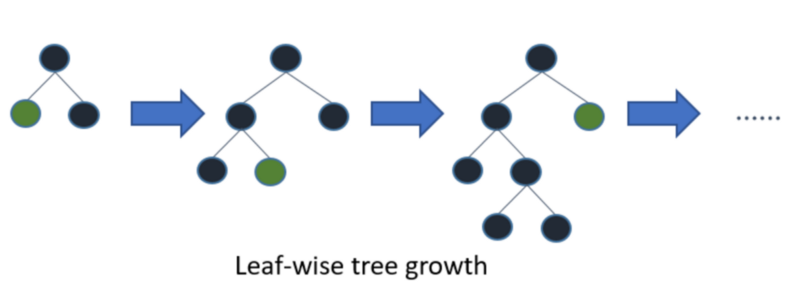
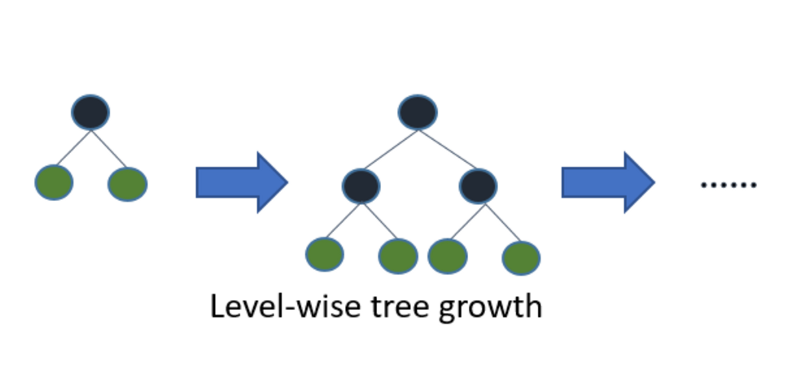

Important points

  <pre>
1> high speed.
2> handle large size data
3> low memory to run .
4> focuses on accuracy and results.

Can we use Light GBM everywhere?

No, it is not advisable to use LGBM on small datasets. Light GBM is sensitive to overfitting and can easily overfit small data. Their is no threshold on the number of rows but my experience suggests me to use it only for data with 10,000+ rows.

<h1> Parameter tunning </h1>
<h2>Parameters</h2>

<h3><u>Control Parameters</u></h3>

<ol>
<li>
max_depth: It describes the maximum depth of tree. This parameter is used to handle model overfitting. Any time you feel that your model is overfitted, my first advice will be to lower max_depth.
    </li>
<li>    
min_data_in_leaf: It is the minimum number of the records a leaf may have. The default value is 20, optimum value. It is also used to deal over fitting
    </li>
 <li>   
feature_fraction: Used when your boosting(discussed later) is random forest. 0.8 feature fraction means LightGBM will select 80% of parameters randomly in each iteration for building trees.
    </li>
<li>    
bagging_fraction: specifies the fraction of data to be used for each iteration and is generally used to speed up the training and avoid overfitting.
    </li>
<li>    
early_stopping_round: This parameter can help you speed up your analysis. Model will stop training if one metric of one validation data doesn’t improve in last early_stopping_round rounds. This will reduce excessive iterations.
    </li>
 <li>   
lambda: lambda specifies regularization. Typical value ranges from 0 to 1.
    </li>
<li>    
min_gain_to_split: This parameter will describe the minimum gain to make a split. It can used to control number of useful splits in tree.
    </li>
<li>    
max_cat_group: When the number of category is large, finding the split point on it is easily over-fitting. So LightGBM merges them into ‘max_cat_group’ groups, and finds the split points on the group boundaries, default:64
</li>
</ol>

<ol>
    
<h3><b><u>Core Parameters</u></b></h3>
<li>
Task: It specifies the task you want to perform on data. It may be either train or predict.
</li>
<li>
application: This is the most important parameter and specifies the application of your model, whether it is a regression problem or classification problem. LightGBM will by default consider model as a regression model.
</li>
<li>
regression: for regression
</li>
<li>
binary: for binary classification
</li>
<li>
multiclass: for multiclass classification problem
</li>
<li>
boosting: defines the type of algorithm you want to run, default=gdbt
</li>
<li>
gbdt: traditional Gradient Boosting Decision Tree
rf: random forest
dart: Dropouts meet Multiple Additive Regression Trees
goss: Gradient-based One-Side Sampling
num_boost_round: Number of boosting iterations, typically 100+

learning_rate: This determines the impact of each tree on the final outcome. GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates. Typical values: 0.1, 0.001, 0.003…

num_leaves: number of leaves in full tree, default: 31

device: default: cpu, can also pass gpu
</li>
</ol>


<h3><u><b>Metric parameter</b></u></h3>
<ol>
<li>    
metric: again one of the important parameter as it specifies loss for model building. Below are few general losses for regression and classification.
    </li>
<li>    
mae: mean absolute error
    </li>
    <li>
mse: mean squared error
    </li>
    <li>
binary_logloss: loss for binary classification
        </li>
  <li>  
multi_logloss: loss for multi classification
IO parameter
max_bin: it denotes the maximum number of bin that feature value will bucket in.

categorical_feature: It denotes the index of categorical features. If categorical_features=0,1,2 then column 0, column 1 and column 2 are categorical variables.

ignore_column: same as categorical_features just instead of considering specific columns as categorical, it will completely ignore them.

save_binary: If you are really dealing with the memory size of your data file then specify this parameter as ‘True’. Specifying parameter true will save the dataset to binary file, this binary file will speed your data reading time for the next time.
</li>
</ol>


<b><u>
Knowing and using above parameters will definitely help you implement the model. Remember I said that implementation of LightGBM is easy but parameter tuning is difficult. So let’s first start with implementation and then I will give idea about the parameter tuning.
    </u></b>





<h1>Implementation</h1>

<h2> Dataset </h2>
This data is very small just 400 rows and 5 columns (specially used for learning purpose). This is a classification problem where we have to predict whether a customer will buy the product from advertise given on the websit


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing the dataset
dataset = pd.read_csv('./Social_Network_Ads.csv')


In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [36]:
t  = dataset[dataset['EstimatedSalary'] > 50000]

t[t['Age'] < 25]

,User ID,Gender,Age,EstimatedSalary,Purchased
4,15804002,Male,19,76000,0
12,15746139,Male,20,86000,0
14,15628972,Male,18,82000,0
55,15649136,Female,24,55000,0
62,15595135,Female,23,66000,0
65,15718071,Male,24,58000,0
67,15654574,Female,23,82000,0
68,15577178,Female,22,63000,0
76,15746737,Male,18,52000,0
86,15694946,Male,24,55000,0


In [46]:
# dataset[['Age','EstimatedSalary','Purchased']].values

X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)



In [47]:
import lightgbm as lgb

In [48]:
d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

Few things to notice in parameters:
<pre>
Used ‘binary’ as objective(remember this is classification problem)

Used ‘binary_logloss’ as metric(same reason, binary classification problem)

‘num_leaves’=10 (as it is small data)

‘boosting type’ is gbdt, we are implementing gradient boosting(you can try random forest)


In [62]:
#Prediction
y_pred=clf.predict(x_test)
#convert into binary values

y_pred = np.round(y_pred)

In [63]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [65]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [58]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)

print(accuracy)

[[68  0]
 [23  9]]
0.77


Parameter Tuning:
Data scientists always struggle in deciding when to use which parameter? and what should be the ideal value of that parameter?

Following set of practices can be used to improve your model efficiency.

num_leaves: This is the main parameter to control the complexity of the tree model. Ideally, the value of num_leaves should be less than or equal to 2^(max_depth). Value more than this will result in overfitting.
min_data_in_leaf: Setting it to a large value can avoid growing too deep a tree, but may cause under-fitting. In practice, setting it to hundreds or thousands is enough for a large dataset.
max_depth: You also can use max_depth to limit the tree depth explicitly.
For Faster Speed:

Use bagging by setting bagging_fraction and bagging_freq
Use feature sub-sampling by setting feature_fraction
Use small max_bin
Use save_binary to speed up data loading in future learning
Use parallel learning, refer to parallel learning guide.
For better accuracy:

Use large max_bin (may be slower)
Use small learning_rate with large num_iterations
Use large num_leaves(may cause over-fitting)
Use bigger training data
Try dart
Try to use categorical feature directly
To deal with over-fitting:

Use small max_bin
Use small num_leaves
Use min_data_in_leaf and min_sum_hessian_in_leaf
Use bagging by set bagging_fraction and bagging_freq
Use feature sub-sampling by set feature_fraction
Use bigger training data
Try lambda_l1, lambda_l2 and min_gain_to_split to regularization
Try max_depth to avoid growing deep tree
